In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**DATA CLEANING**

Get info about the data. (look at variable types, check for missing values, duplicates, outliers etc.)

In [4]:
print(train_data.info())
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

The column 'Cabin' seems to have a lot of missing values. There's also variables that need to be reformated since their type is not applicable for most models.

In [5]:
print(train_data.describe())
print()
print(test_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

       PassengerId      Pclass         Age       SibSp       Parch        Fare
c

In [6]:
print('train data duplicates: ', train_data.duplicated().sum())
print()
print('test data duplicates: ', test_data.duplicated().sum())

train data duplicates:  0

test data duplicates:  0


In [7]:
print(train_data.isna().sum())
print()
print(test_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Concatenate data

In [8]:
combined_data = pd.concat([train_data, test_data], axis = 0)
combined_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
combined_data = combined_data.drop(columns = 'Cabin')

Removed cabin column since its mostly populated by NaN values

Now let's deal with the missing values at the age columns replacing them with the mean age and lastly lets drop the 3 rows that still inlcude missing values, so we don't experience problems while fitting our model.

In [10]:
mean_age = combined_data['Age'].mean()
combined_data['Age'] = combined_data['Age'].fillna(mean_age)

In [11]:
combined_data = combined_data.dropna(axis = 0)
print(combined_data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Since we are gonna be using machine learning models on our data it would be a good practise to normalize our skewed data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

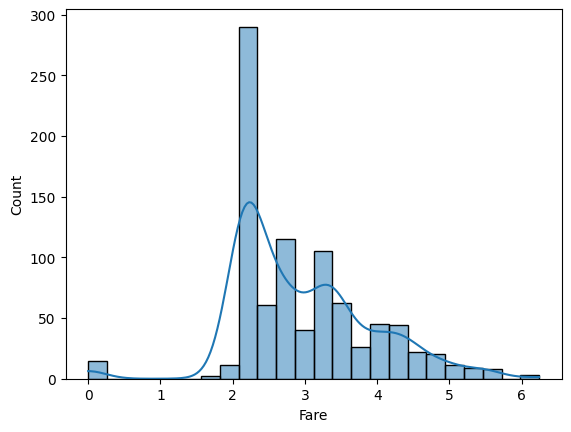

In [12]:
combined_data['Fare'] = combined_data['Fare'].apply(np.log1p)
sns.histplot(combined_data['Fare'], kde = True)

Now lets one-hot encode the categorical variables.

In [13]:
combined_data['Sex'] = combined_data['Sex'].map({'male': 0, 'female': 1})
combined_data['Embarked'] = combined_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
combined_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,2.110213,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,4.280593,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,2.188856,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,3.990834,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,2.202765,2
5,6,0.0,3,"Moran, Mr. James",0,29.881138,0,0,330877,2.246893,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,3.967694,2
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,3.094446,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,2.495954,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,3.436268,0


**Feature engineering**

Group people with the same ticket number

In [14]:
combined_data['Ticket_Group'] = combined_data.groupby('Ticket').ngroup()
combined_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Group
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,2.110213,2,522
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,4.280593,0,595
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,2.188856,2,668
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,3.990834,2,48
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,2.202765,2,471
5,6,0.0,3,"Moran, Mr. James",0,29.881138,0,0,330877,2.246893,1,274
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,3.967694,2,84
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,3.094446,2,394
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,2.495954,2,343
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,3.436268,0,131


Family size using Parch and SibSp

In [15]:
combined_data['Family_size'] = combined_data['SibSp'] + combined_data['Parch']
combined_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Group,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,2.110213,2,522,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,4.280593,0,595,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,2.188856,2,668,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,3.990834,2,48,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,2.202765,2,471,0
5,6,0.0,3,"Moran, Mr. James",0,29.881138,0,0,330877,2.246893,1,274,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,3.967694,2,84,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,3.094446,2,394,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,2.495954,2,343,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,3.436268,0,131,1


Age group

In [16]:
from sklearn.preprocessing import LabelEncoder
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-100']
label_encoder = LabelEncoder()
combined_data['Age_group'] = pd.cut(combined_data['Age'], bins = bins, labels = labels, right = False)
combined_data['Age_group'] = label_encoder.fit_transform(combined_data['Age_group'])
combined_data['Age_group'].head()

0    1
1    2
2    1
3    2
4    2
Name: Age_group, dtype: int64

Title feature from string name

In [17]:
combined_data['Title'] = combined_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Group,Family_size,Age_group,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,2.110213,2,522,1,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.280593,0,595,1,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.188856,2,668,0,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.990834,2,48,1,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.202765,2,471,0,2,Mr


In [18]:
print(combined_data['Title'].unique())
print(combined_data['Title'].value_counts())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Title
Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


In [19]:
combined_data = pd.get_dummies(combined_data, columns=['Title'], prefix='Title')
df_train = combined_data[:len(train_data)]
df_test = combined_data[:len(test_data)]
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,2.110213,...,False,False,False,False,True,False,False,False,False,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.280593,...,False,False,False,False,False,True,False,False,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.188856,...,False,True,False,False,False,False,False,False,False,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.990834,...,False,False,False,False,False,True,False,False,False,False
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.202765,...,False,False,False,False,True,False,False,False,False,False


Let's remove unecessary columns

In [20]:
df_train = df_train.drop(columns = ['Name', 'Ticket'])
df_test = df_test.drop(columns = ['Name', 'Ticket', 'Survived'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_Group,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0.0,3,0,22.0,1,0,2.110213,2,522,...,False,False,False,False,True,False,False,False,False,False
1,2,1.0,1,1,38.0,1,0,4.280593,0,595,...,False,False,False,False,False,True,False,False,False,False
2,3,1.0,3,1,26.0,0,0,2.188856,2,668,...,False,True,False,False,False,False,False,False,False,False
3,4,1.0,1,1,35.0,1,0,3.990834,2,48,...,False,False,False,False,False,True,False,False,False,False
4,5,0.0,3,0,35.0,0,0,2.202765,2,471,...,False,False,False,False,True,False,False,False,False,False


**Modeling**

In [21]:
print(df_train.isna().sum())
print(df_test.isna().sum())

PassengerId           0
Survived              0
Pclass                0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked              0
Ticket_Group          0
Family_size           0
Age_group             0
Title_Capt            0
Title_Col             0
Title_Don             0
Title_Dr              0
Title_Jonkheer        0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_Sir             0
Title_the Countess    0
dtype: int64
PassengerId           0
Pclass                0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked              0
Ticket_Group          0
Family_size           0
Age_group             0
Title_Capt            0
Tit

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

In [23]:
y = df_train['Survived']
X = df_train.drop(columns = 'Survived')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 42)

In [24]:
X_train.dtypes
X_train['Age_group'].head()

387    2
418    2
74     2
415    1
308    2
Name: Age_group, dtype: int64

In [25]:
models = {
    'Logistic Regression': LogisticRegression(max_iter = 2200),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score
}

# Define the parameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10],
                            'penalty': ['l1', 'l2'],
                            'solver': ['liblinear', 'saga']},
    'Random Forest': {'n_estimators': [100, 200, 300, 400], 'max_depth': [None, 10, 20, 25]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300, 400], 'max_depth': [None, 3, 5, 7, 10]},
    'XGBoost': {'n_estimators': [100, 200, 300, 400], 'max_depth': [None, 3, 5, 7, 10]}
}

results = {}

for model_name, model in models.items():
    model_results = {'Model': model_name}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get best parameters and best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    
    # Loop over each metric
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring=metric_name.lower())
        model_results[metric_name] = scores.mean()

    results[model_name] = model_results

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'

print(results_df)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

                                   Model  accuracy precision    recall  \
Model                                                                    
Logistic Regression  Logistic Regression  0.833113  0.794387  0.761343   
Random Forest              Random Forest  0.838411  0.818259  0.733575   
Gradient Boosting      Gradient Boosting  0.811921    0.7849  0.730127   
XGBoost                          XGBoost  0.813245  0.777424  0.716213   

                           f1   roc_auc  
Model                                    
Logistic Regression  0.777344  0.871154  
Random Forest        0.784438  0.876503  
Gradient Boosting    0.758937  0.860198  
XGBoost              0.745313  0.860758  


Apply the Random Forest which is the best performing on my val data.

In [26]:
# Identify the best performing model (in this case, Random Forest)
best_model_name = results_df['f1'].idxmax()
best_estimator = grid_search.best_estimator_

# Apply the best performing model to the validation set
y_pred_val = best_estimator.predict(X_val)
f1_score_val = f1_score(y_val, y_pred_val)
print("Validation F1 Score (Random Forest):", f1_score_val)

Validation F1 Score (Random Forest): 0.7428571428571428


Apply on the test data and create the submission file

In [27]:
X_test = df_test

In [28]:
print(X_train.columns)
print()
print(X_test.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Ticket_Group', 'Family_size', 'Age_group', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Ticket_Group', 'Family_size', 'Age_group', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')


In [29]:
X_test = df_test

In [30]:
# Make predictions on the test data
y_pred_test = best_estimator.predict(X_test)

submission_df = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],
    'Survived': y_pred_test
})

# Save the DataFrame to a CSV file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

print("CSV file created successfully.")

CSV file created successfully.
